# 1.5_Supervised Learning: Artificial Neural Network

### Contents:
1. Install Libraries
2. Import Libraries
3. Import Datasets
4. ANN
   - Reduce to Relevant Temp Data
   - Create X/y Variables & Train/Test Sets
   - Run ANN Model (cycles through layter/node iterations)

## 1. Install Libraries

In [5]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


## 2. Import Libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

## 3. Import Datasets

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
path = os.getcwd()
path

'/Users/kirstencurrie/ClimateWins Analysis/02 Scripts'

In [13]:
path = '/Users/kirstencurrie/ClimateWins Analysis'

In [19]:
#Read in European unscaled weather data
climate = pd.read_csv(os.path.join(path, '01 Datasets', '01 Original Data', 'Dataset-weather-prediction-dataset-processed.csv'), index_col = False)
climate.head(3)

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.0,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,7.7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,5.4,0.83,1.0161,0.12,0.08,0,0.0,10.0,7.0,11.5,8,0.91,0.00,0,0.8,-0.3,1.6,7,0.91,1.0010,0.13,0.22,0,0.0,10.6,9.4,8.3,2.9,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.4,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,8.7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.0,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,0.20,0.1,0,0.0,6.9,1.1,10.4,8,4.0,0.98,0.9978,0.04,1.14,0,0.0,4.9,3.8,5.9,3,2.6,0.73,1.0152,7.1,7.8,4,4.5,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,3.8,0.76,1.0169,1.54,0.44,10.0,7.8,12.2,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1

In [21]:
climate.shape

(22950, 170)

In [34]:
#Read in "pleasant weather" answers data
pleasant = pd.read_csv(os.path.join(path, '01 Datasets', '01 Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'),index_col=False)
pleasant.head(3)

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
pleasant.shape

(22950, 16)

## 4. Artificial Neural Network Model

### Reduce to Relevant Temp Data

In [28]:
#Reduce to just the mean temperatures (minus Roma, Tours, & Gdansk) for UNSCALED data
df = climate[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'VALENTIA_temp_mean']].copy()
df.head(1)

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
0,19600101,1,6.5,3.7,2.4,9.3,10.0,10.6,7.9,-0.6,9.5,7.6,6.9,4.9,-5.9,4.2,8.5


### Create X & Y Variables & Train/Test Sets

In [38]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df.drop(['DATE', 'MONTH'], axis=1)
y = pleasant.drop(['DATE'], axis=1)

In [40]:
print(X.shape)
print(y.shape)

(22950, 15)
(22950, 15)


In [42]:
### Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 15)
(5738, 15)
(17212, 15)
(5738, 15)


### Compare Unscaled / Scaled Data

In [46]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[ 1.35262702  1.11408523  1.26048221  0.98510239  1.18267178  0.79366897
   1.16696642  1.02406684  1.12530567  1.32713725  1.26235516  0.49003378
   1.0719053   0.14041372  1.45475014]
 [-1.65254457 -1.84706463 -1.77256635 -1.98055572 -2.10946465 -1.72667839
  -0.01359355 -1.83095876 -2.09029531 -1.23266439 -1.73566519 -2.14158559
  -1.80450767 -1.77299837 -0.0139084 ]
 [-1.65254457 -1.07557731 -1.43164228 -2.35915038 -2.37401133 -2.43932834
  -2.27141449 -1.22608045 -2.43428984 -1.73115208 -1.43460876 -2.5296585
  -1.322672   -1.94694492 -2.92125284]
 [-1.59839734 -1.35921235 -1.20827824 -1.55463674 -1.68325056 -1.53547963
  -1.78443351 -1.34705611 -1.67151937 -1.7042068  -1.66040109 -1.57160352
  -2.31554551 -1.18903494 -1.1828407 ]
 [-0.58313666 -0.67848825 -0.65574614 -0.68702399 -0.84551941 -0.70115774
  -0.01359355 -0.50022649 -0.6395358  -0.5320871  -0.48126337 -0.71056677
  -1.41027848 -0.79144282 -0.0139084 ]
 [ 1.06835403  0.68295996  0.81375413  0.32256175  0.41842582  0.9

In [48]:
#Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

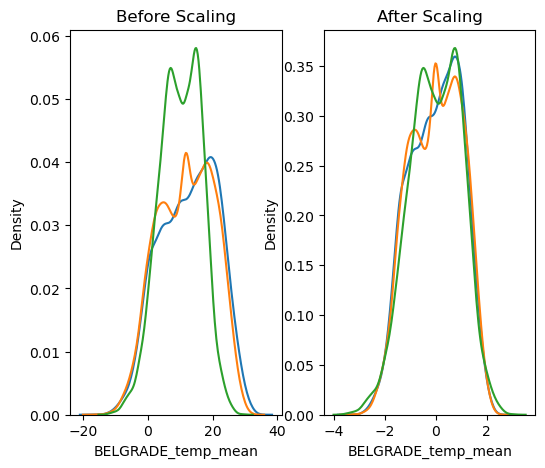

In [52]:
#Show scaling differences
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['BELGRADE_temp_mean'], ax=ax1)
sns.kdeplot(X_train['BUDAPEST_temp_mean'], ax=ax1)
sns.kdeplot(X_train['DEBILT_temp_mean'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_df['BELGRADE_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['BUDAPEST_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df['DEBILT_temp_mean'], ax=ax2)

plt.show()

### Run ANN Model

In [56]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [72]:
y_pred_train = mlp.predict(X_train)
print('Train accuracy score: ',accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_pred_test, y_test))

Train accuracy score:  0.43684638624215666
Test accuracy score:  0.439177413733008


In [134]:
from sklearn.metrics import classification_report

# For the training data
print('Train Classification Report:')
report_train = classification_report(y_train, y_pred)
print(report_train)

# For the test data
print('\nTest Classification Report:')
report_test = classification_report(y_test, y_pred_test)
print(report_test)


Train Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.74      0.70      4264
           1       0.72      0.79      0.76      6030
           2       0.70      0.84      0.77      5593
           3       0.63      0.64      0.63      3358
           4       0.63      0.65      0.64      3703
           5       0.61      0.63      0.62      3791
           6       0.62      0.59      0.61      2851
           7       0.66      0.78      0.72      4833
           8       0.66      0.69      0.67      3590
           9       0.84      0.88      0.86      7677
          10       0.64      0.69      0.67      3575
          11       0.68      0.58      0.63      2720
          12       0.00      0.00      0.00         0
          13       0.67      0.65      0.66      2922
          14       0.51      0.06      0.11       898

   micro avg       0.69      0.72      0.70     55805
   macro avg       0.62      0.61      0.60     558

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pac

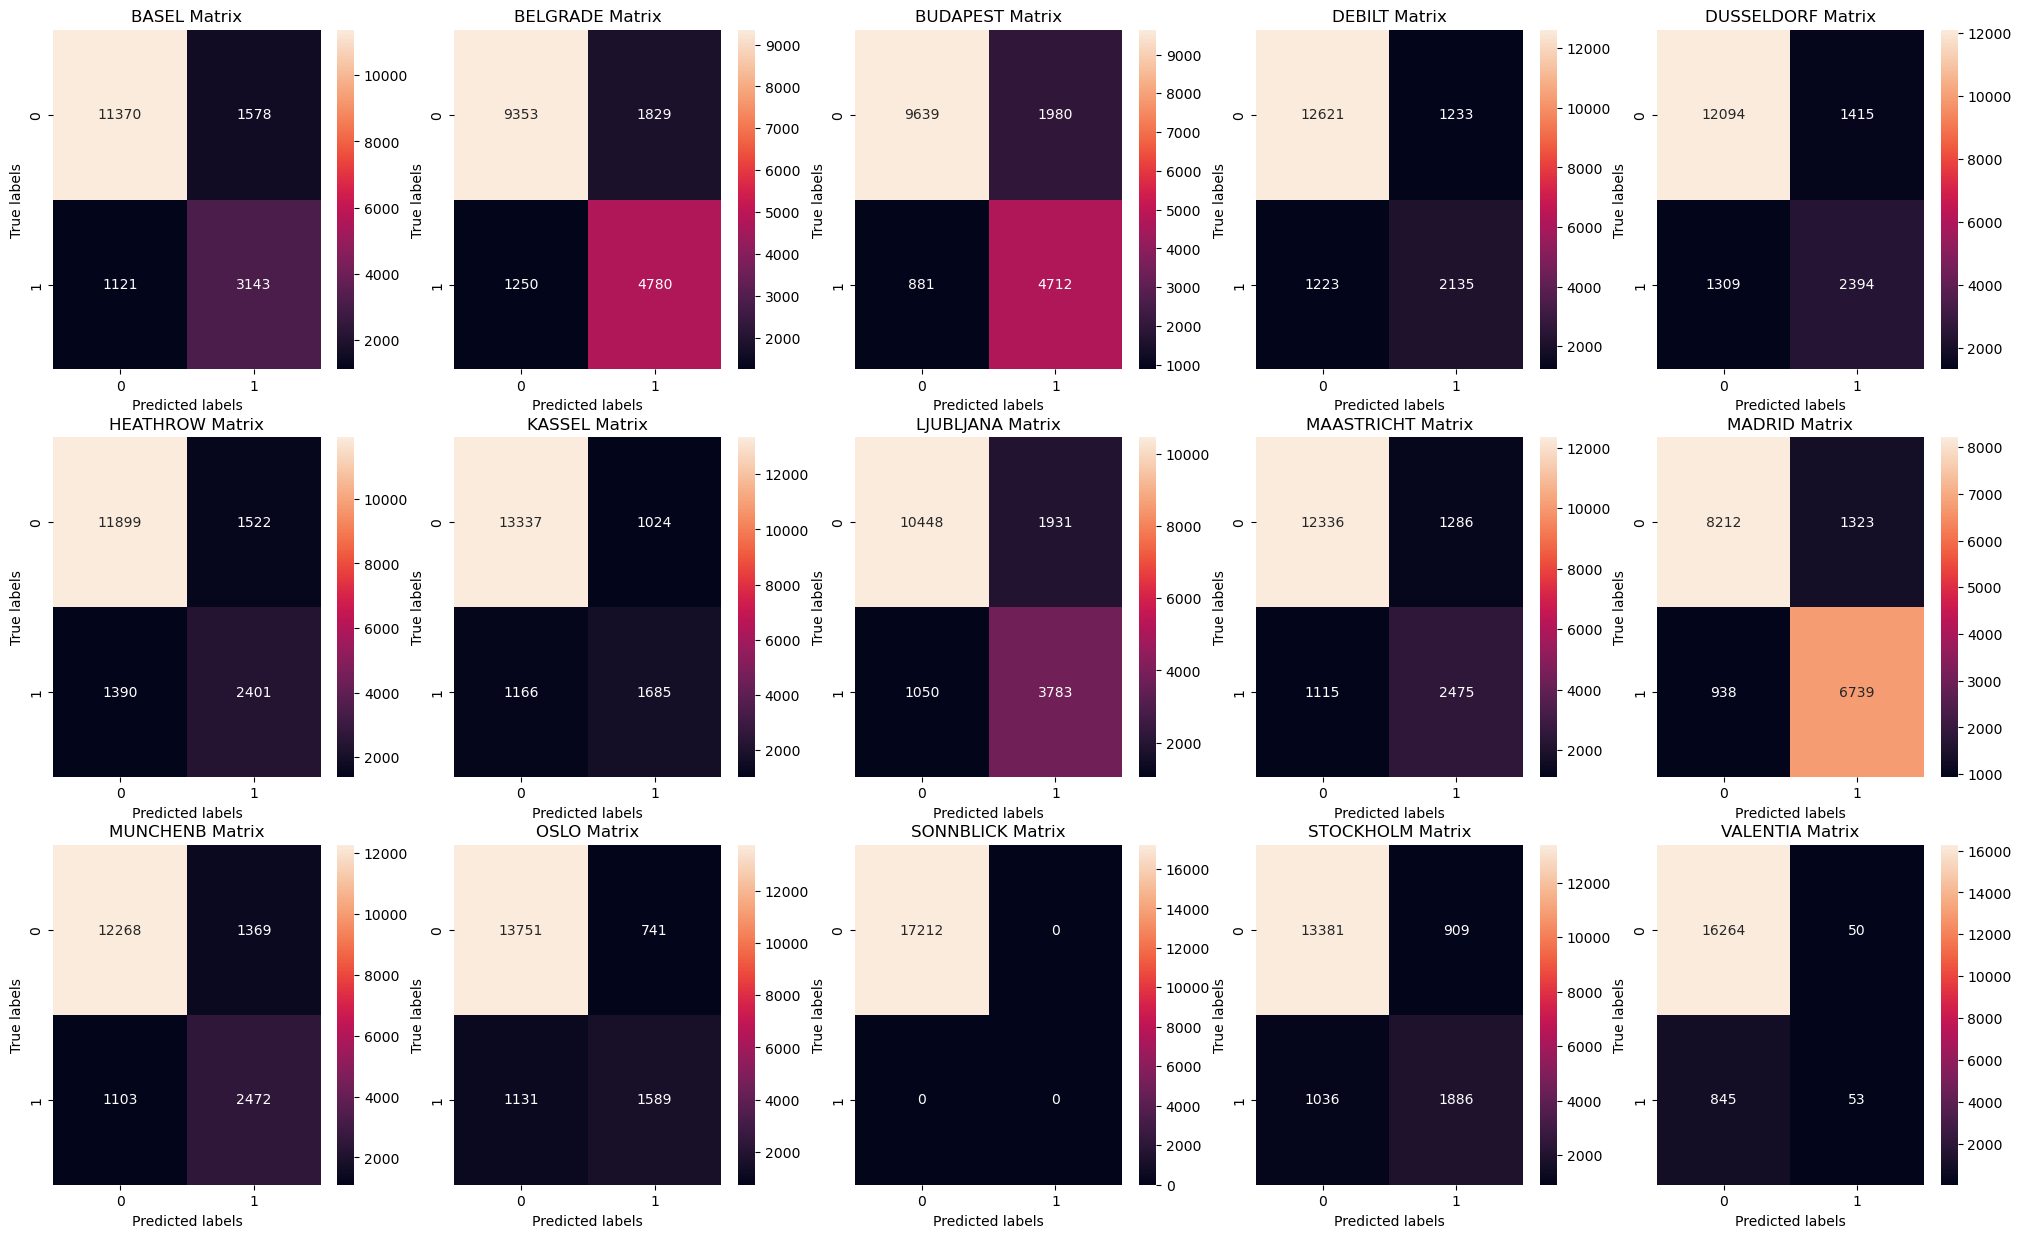

In [74]:
#Plot out multi-confusion matrix for train data

locations = list({x.split("_")[0] for x in X_train.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count], labels=[0, 1])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

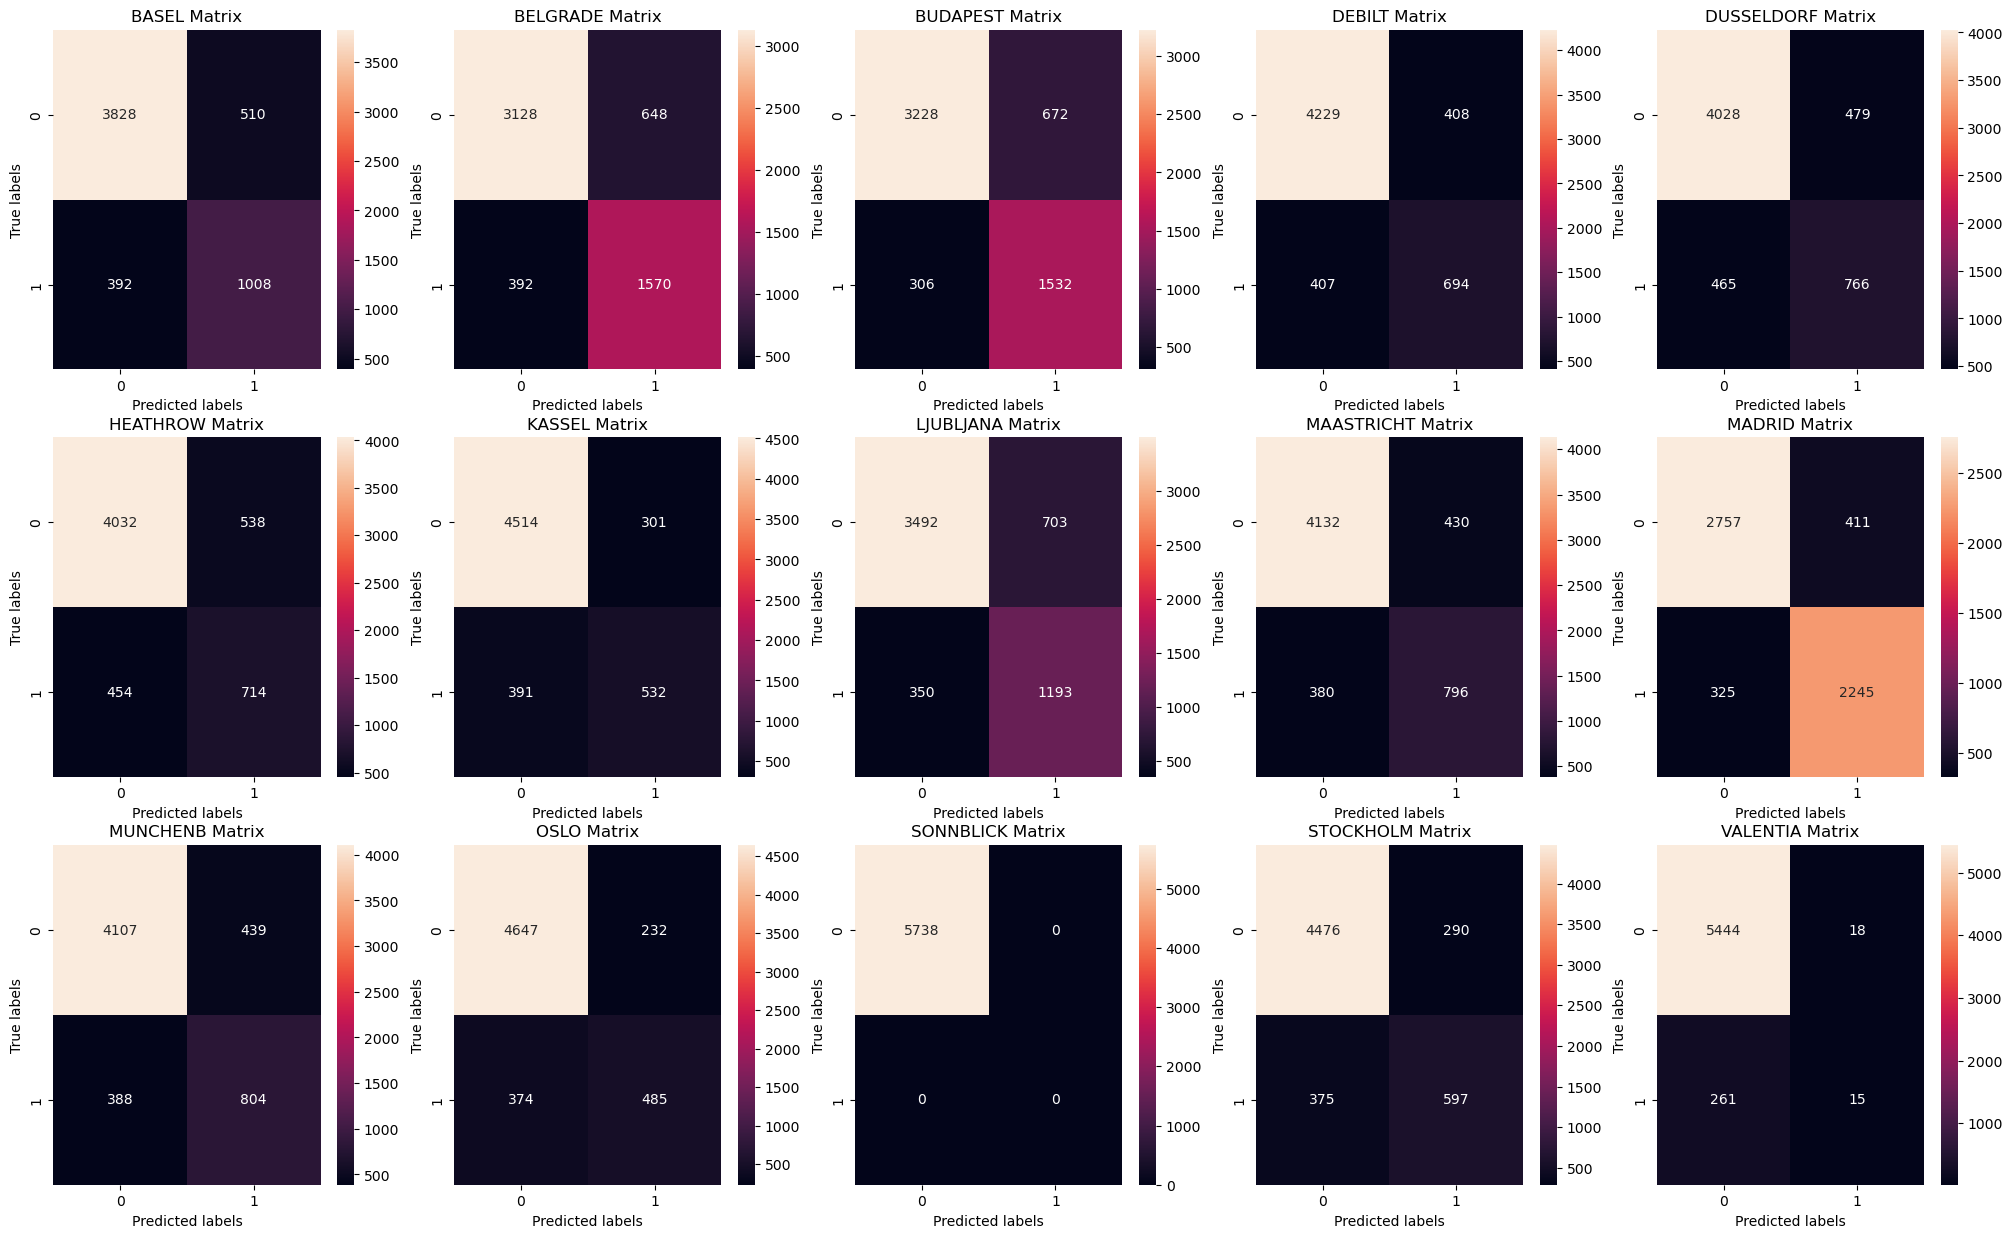

In [76]:
#Plot out multi-confusion matrix for test data

locations = list({x.split("_")[0] for x in X_test.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count], labels=[0, 1])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

#### Try to improve ANN accuracy by adjusting layers & nodes

In [128]:
# Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(400,200,100,50), max_iter=5000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(400, 200, 100, 50), max_iter=5000)

In [130]:
y_pred_train = mlp.predict(X_train)
print('Train accuracy score: ',accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_pred_test, y_test))

Train accuracy score:  0.43684638624215666
Test accuracy score:  0.42436388985709306


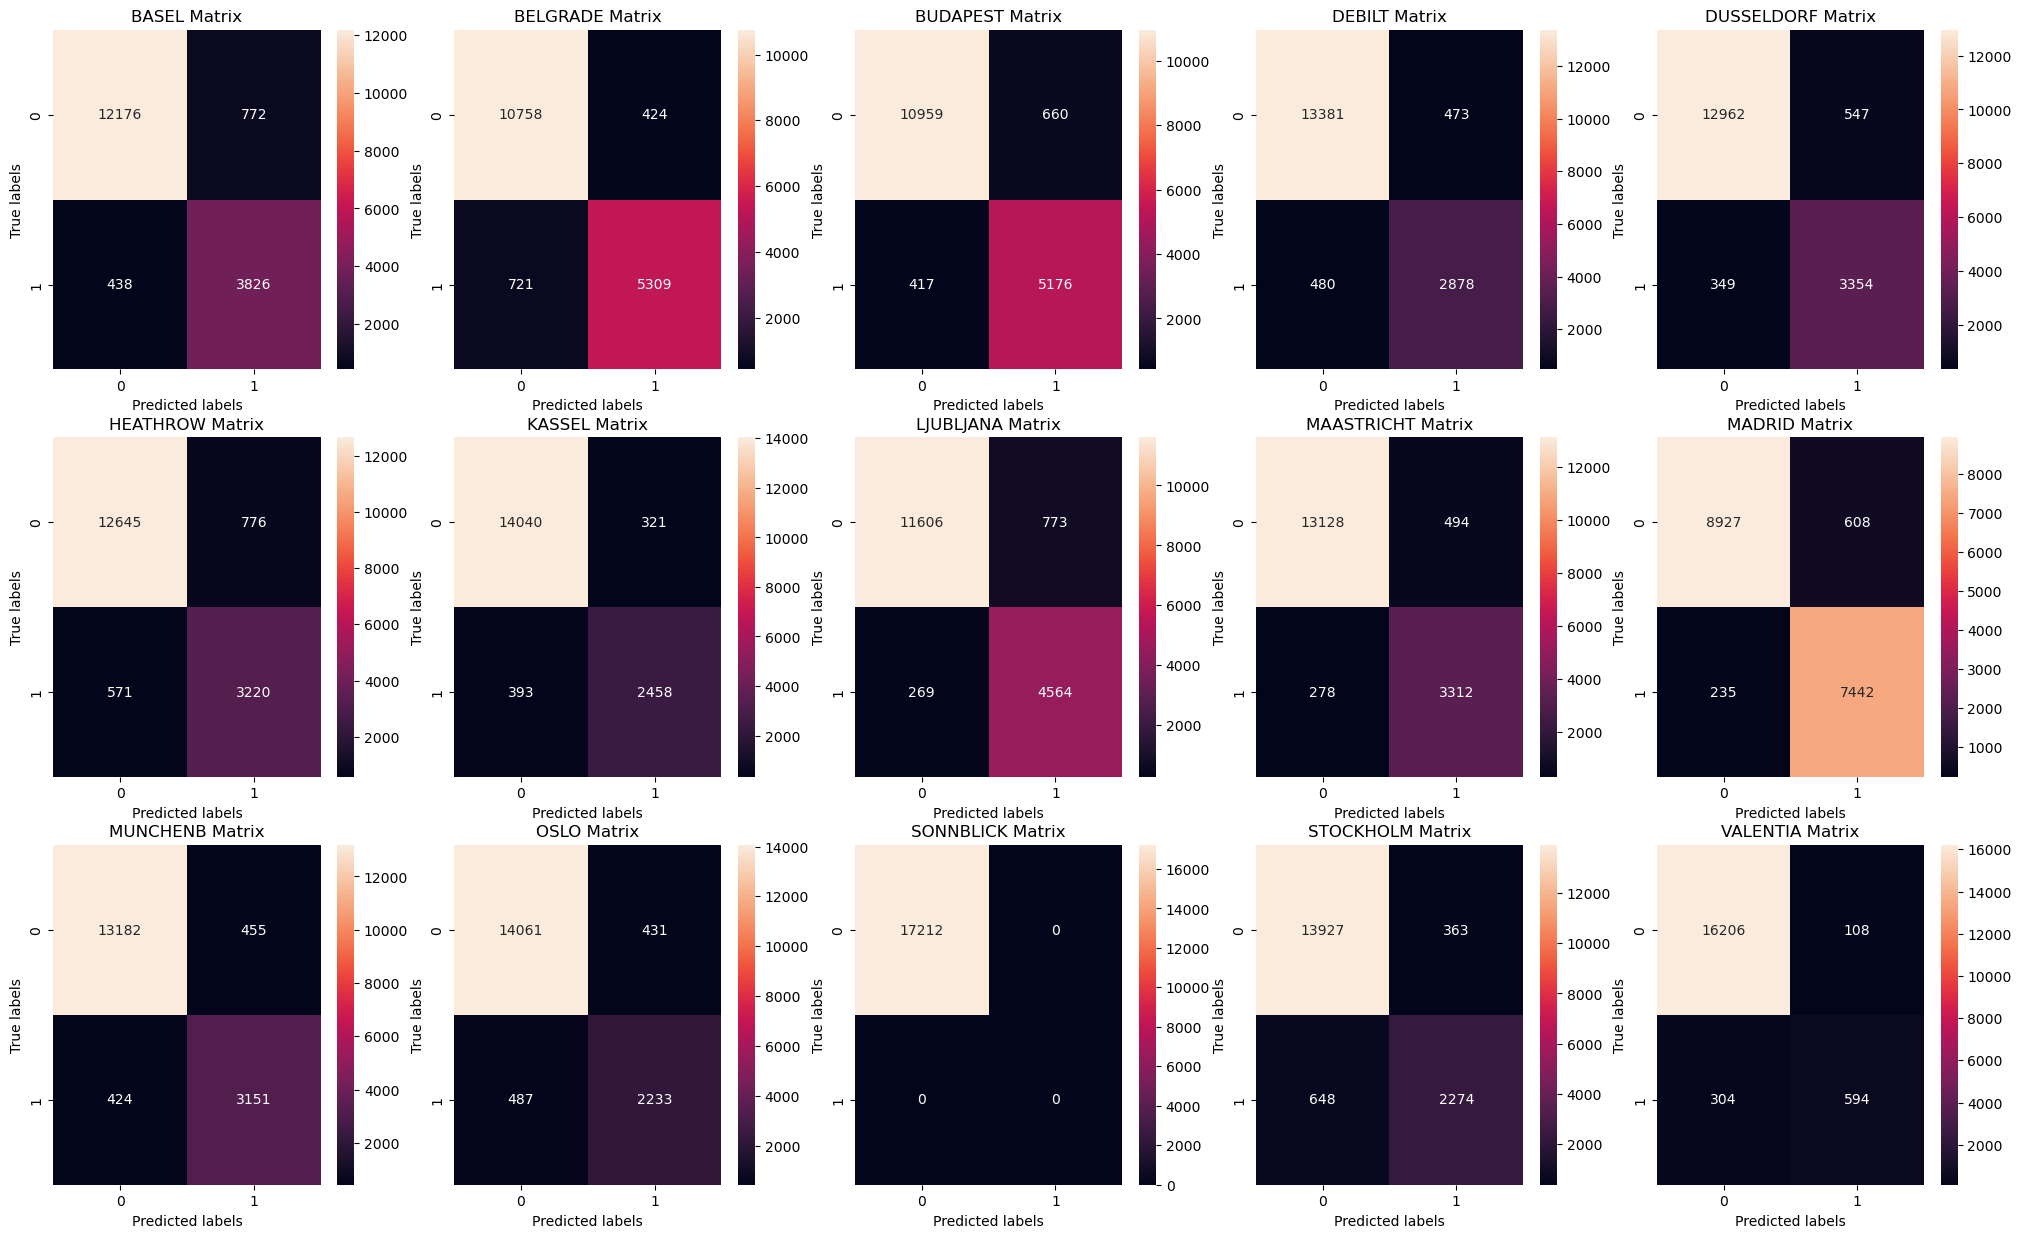

In [136]:
#Plot out multi-confusion matrix for train data

locations = list({x.split("_")[0] for x in X_train.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count], labels=[0, 1])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

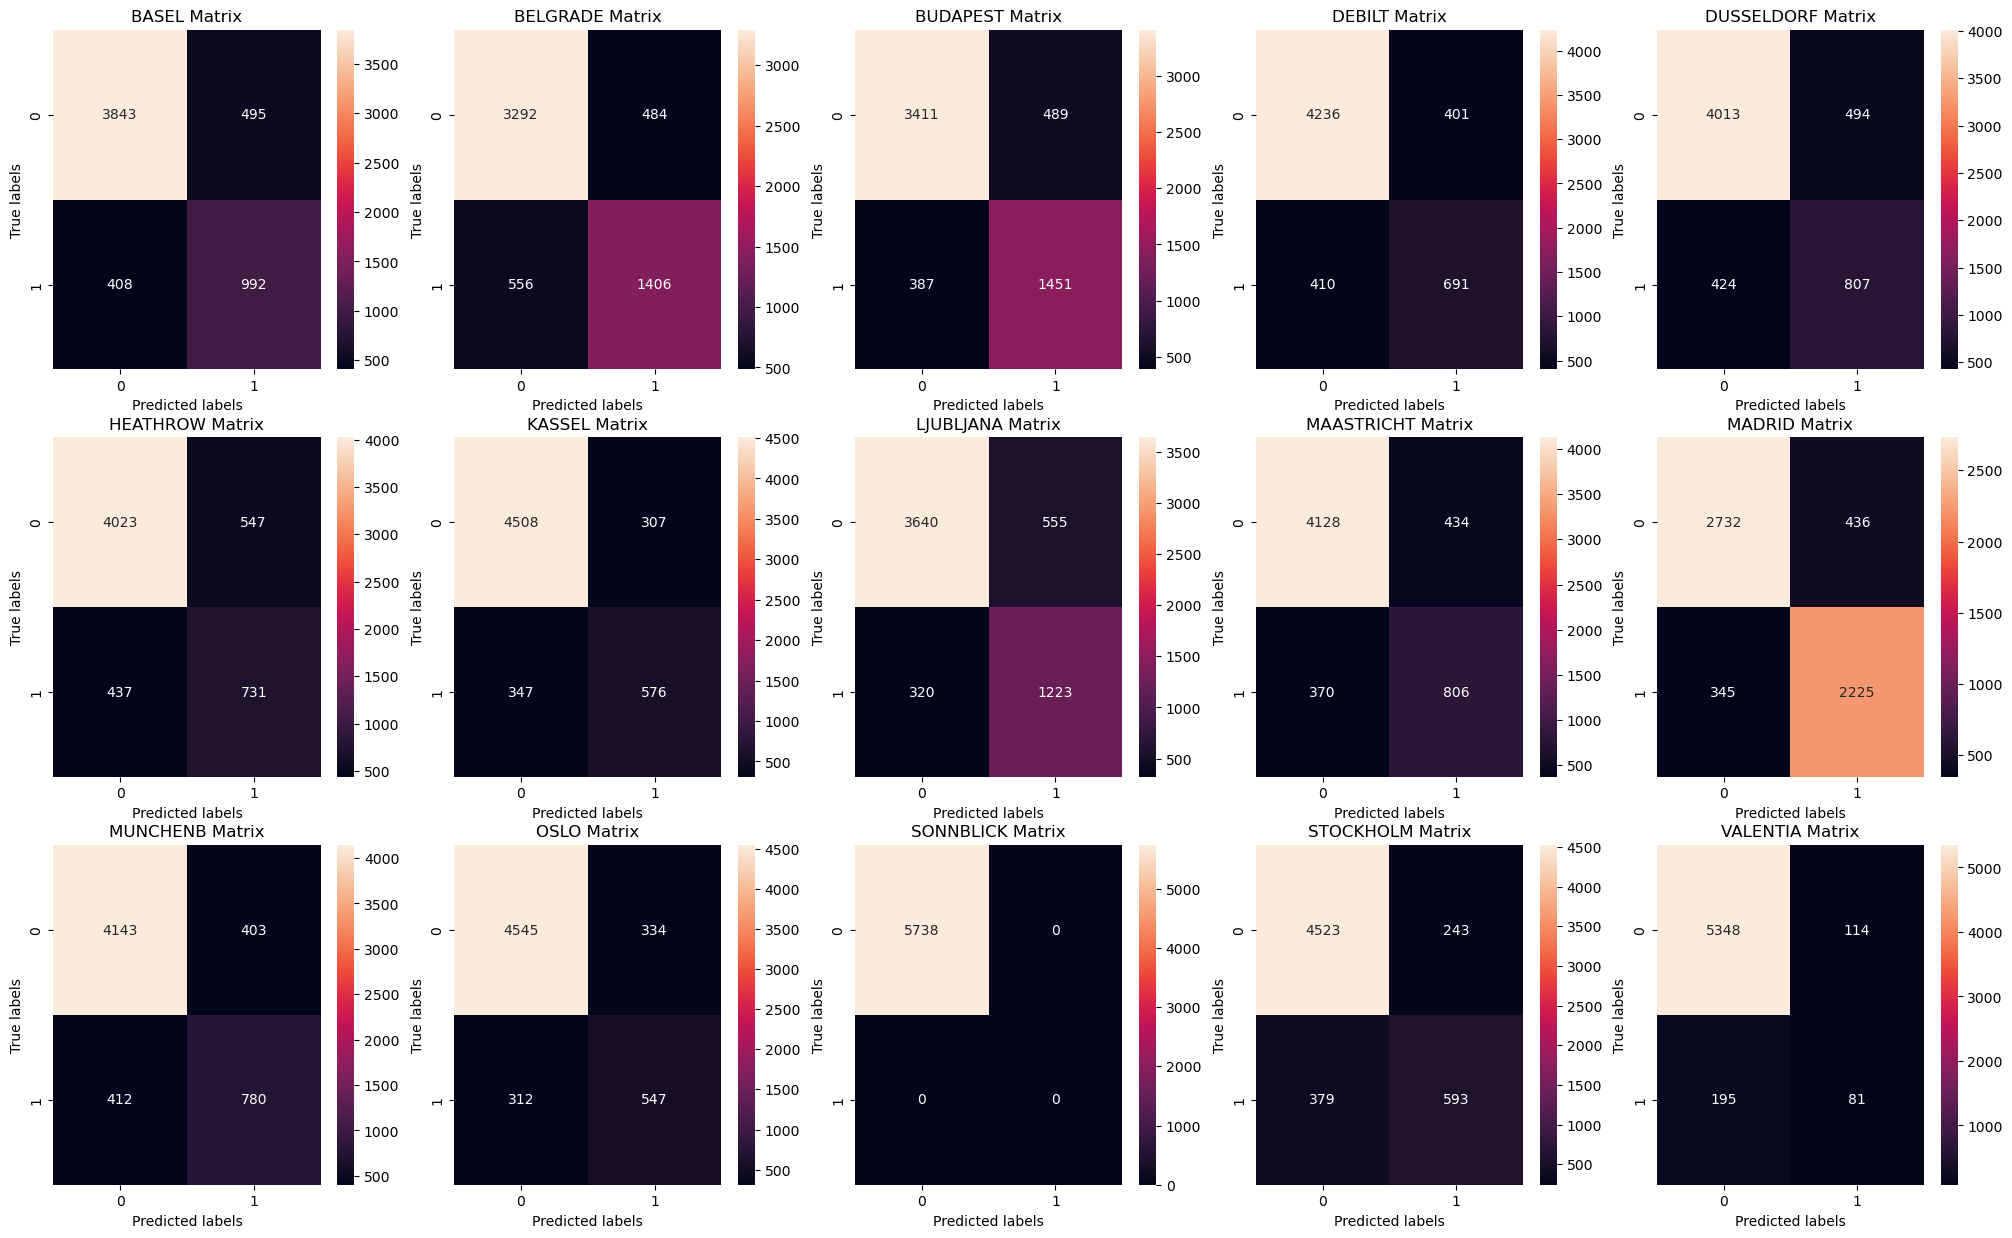

In [138]:
#Plot out multi-confusion matrix for test data

locations = list({x.split("_")[0] for x in X_test.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count], labels=[0, 1])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [132]:
from sklearn.metrics import classification_report

# For the training data
print('Train Classification Report:')
report_train = classification_report(y_train, y_pred)
print(report_train)

# For the test data
print('\nTest Classification Report:')
report_test = classification_report(y_test, y_pred_test)
print(report_test)


Train Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.74      0.70      4264
           1       0.72      0.79      0.76      6030
           2       0.70      0.84      0.77      5593
           3       0.63      0.64      0.63      3358
           4       0.63      0.65      0.64      3703
           5       0.61      0.63      0.62      3791
           6       0.62      0.59      0.61      2851
           7       0.66      0.78      0.72      4833
           8       0.66      0.69      0.67      3590
           9       0.84      0.88      0.86      7677
          10       0.64      0.69      0.67      3575
          11       0.68      0.58      0.63      2720
          12       0.00      0.00      0.00         0
          13       0.67      0.65      0.66      2922
          14       0.51      0.06      0.11       898

   micro avg       0.69      0.72      0.70     55805
   macro avg       0.62      0.61      0.60     558

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pac

#### Try Another KNN Adjustment

In [186]:
mlp = MLPClassifier(hidden_layer_sizes=(400, 200, 100, 50), max_iter=10000, 
                    tol=0.0001, alpha=0.0001, activation='relu', 
                    learning_rate='adaptive', learning_rate_init=0.001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(400, 200, 100, 50), learning_rate='adaptive',
              max_iter=10000)

In [188]:
y_pred_train = mlp.predict(X_train)
print('Train accuracy score: ',accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_pred_test, y_test))

Train accuracy score:  0.43684638624215666
Test accuracy score:  0.4341233879400488


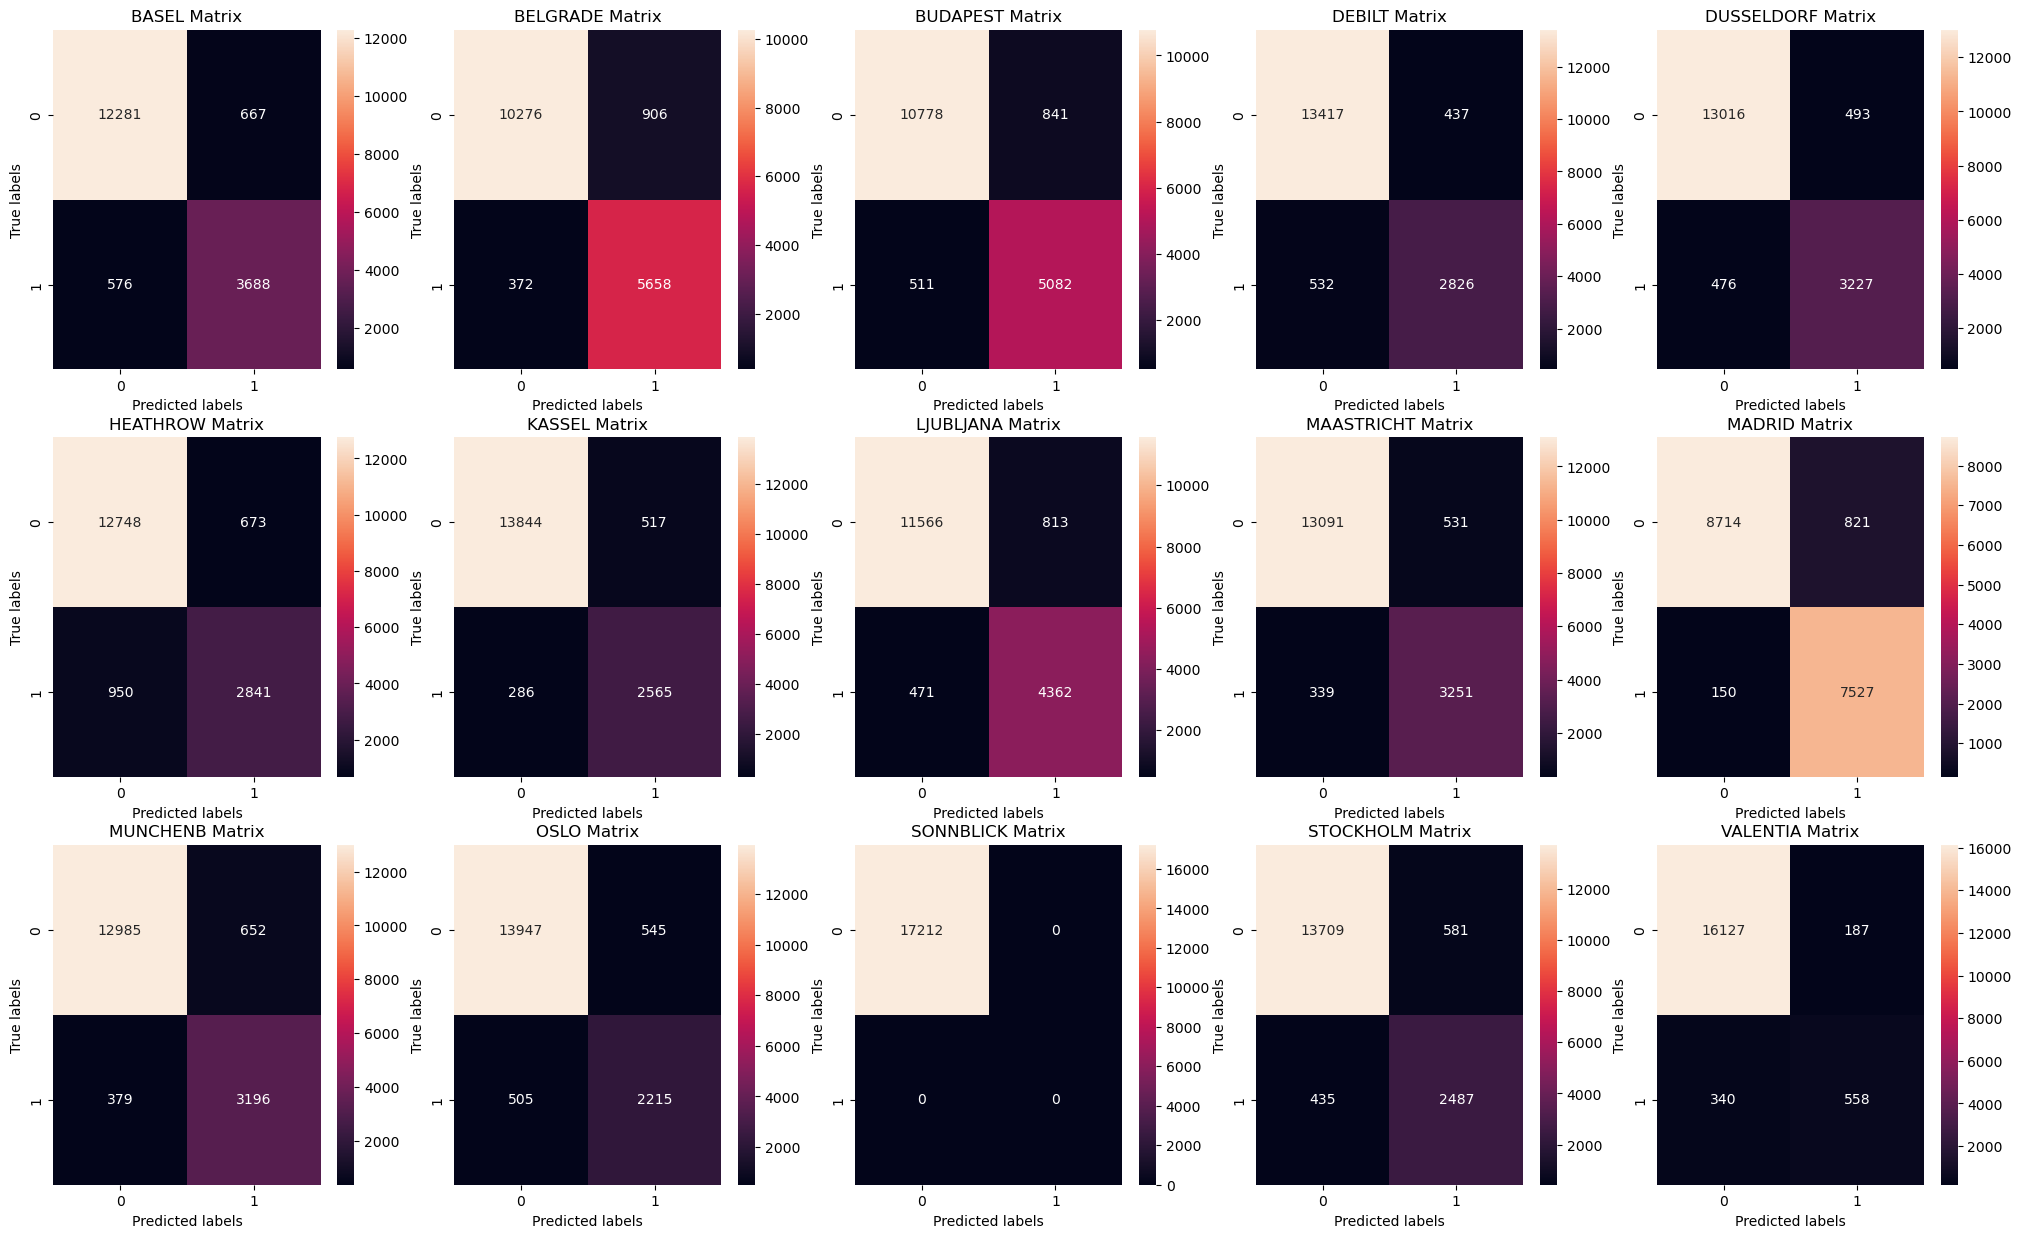

In [192]:
#Plot out multi-confusion matrix for train data

locations = list({x.split("_")[0] for x in X_train.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count], labels=[0, 1])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

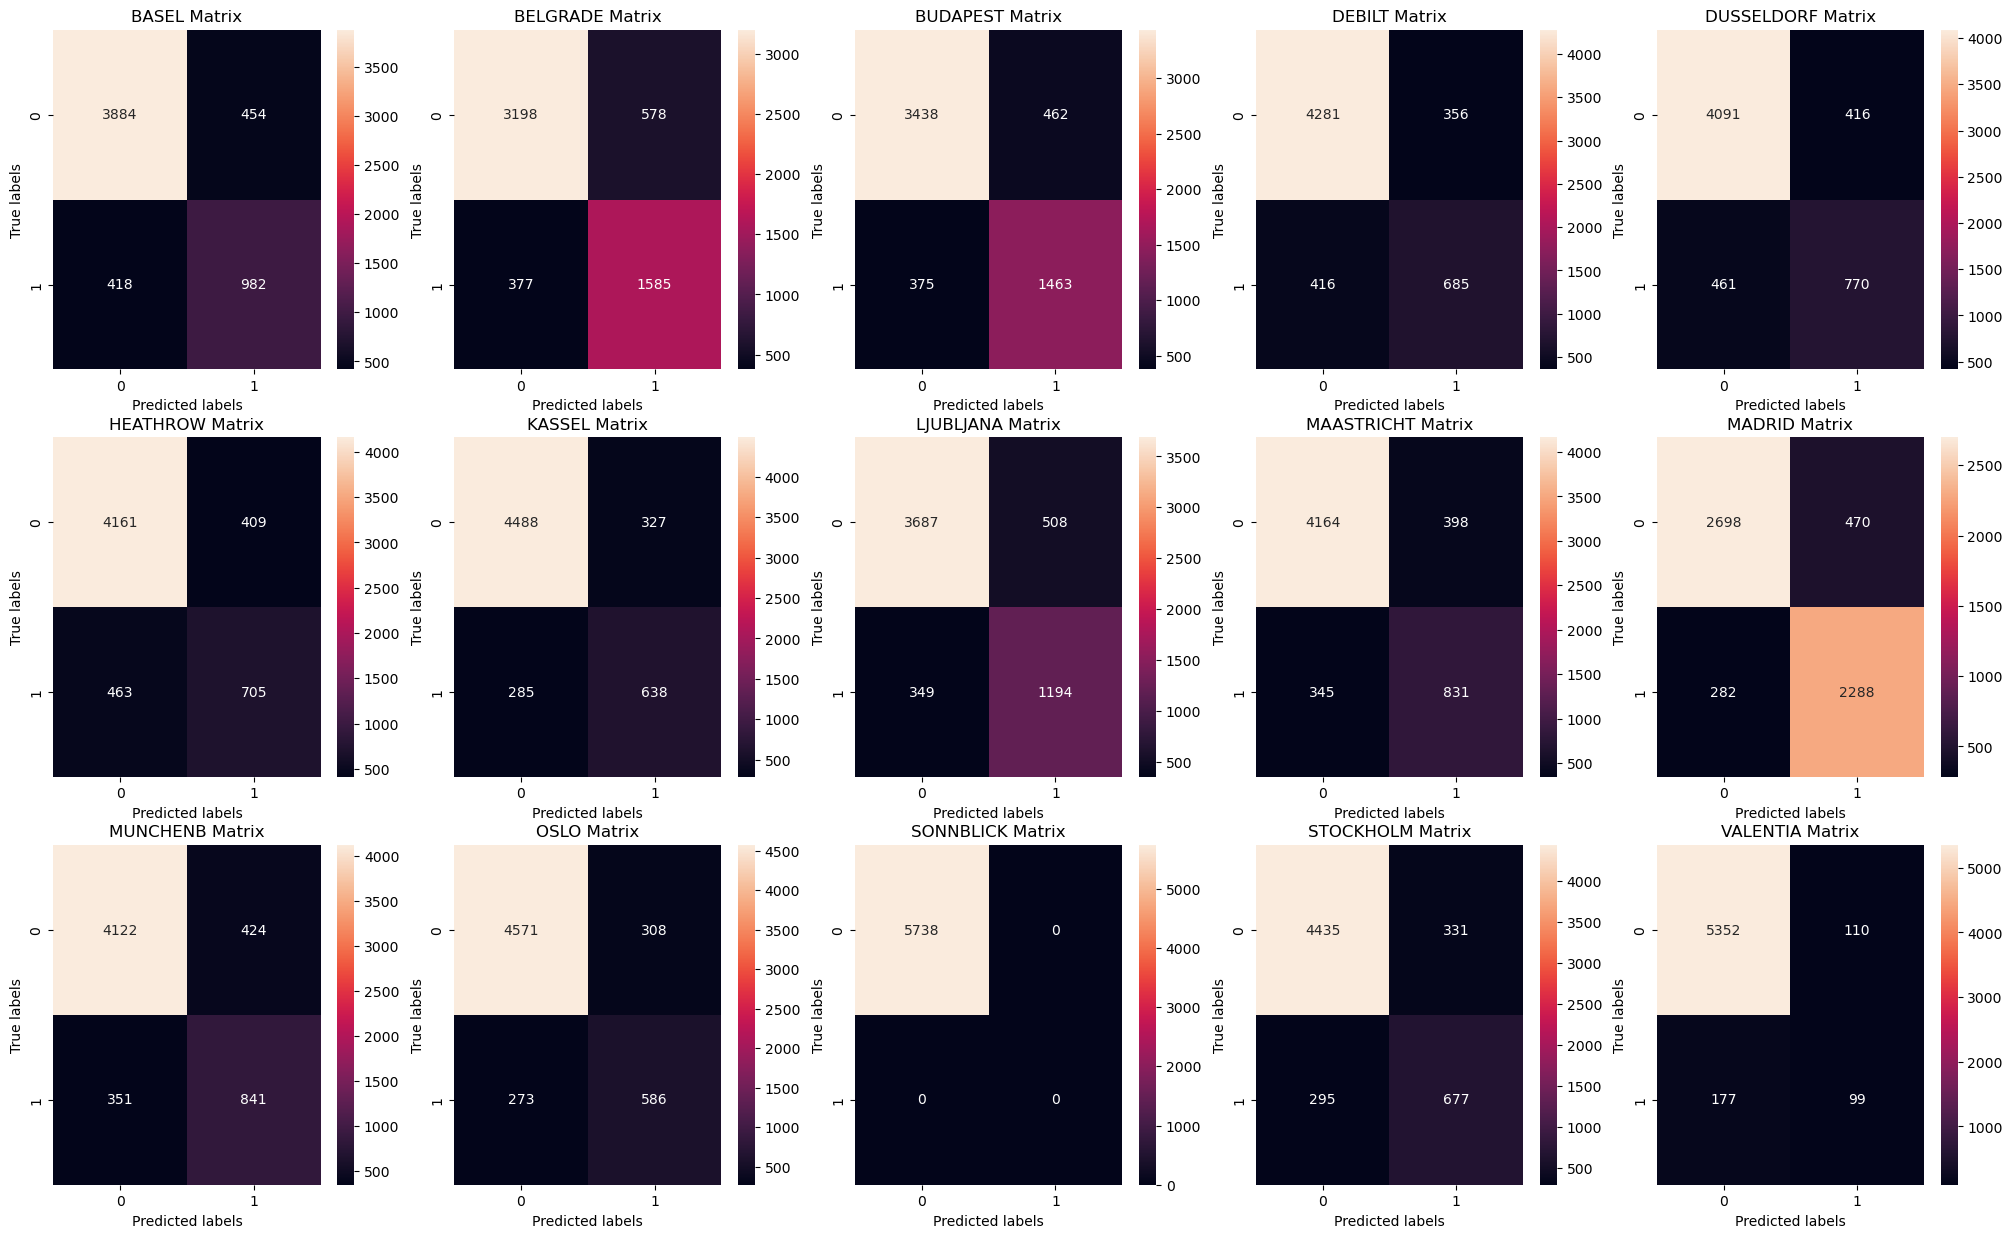

In [194]:
#Plot out multi-confusion matrix for test data

locations = list({x.split("_")[0] for x in X_test.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count], labels=[0, 1])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

#### More layers & nodes don't seem to be doing the trick

In [196]:
mlp = MLPClassifier(hidden_layer_sizes=(35, 35), max_iter=500, 
                    tol=0.0001, alpha=0.0001, activation='relu', 
                    learning_rate='adaptive', learning_rate_init=0.001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(35, 35), learning_rate='adaptive',
              max_iter=500)

In [198]:
y_pred_train = mlp.predict(X_train)
print('Train accuracy score: ',accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_pred_test, y_test))

Train accuracy score:  0.43684638624215666
Test accuracy score:  0.4578250261415127


#### Less overfitting = better??

In [200]:
from sklearn.metrics import classification_report

# For the training data
print('Train Classification Report:')
report_train = classification_report(y_train, y_pred)
print(report_train)

# For the test data
print('\nTest Classification Report:')
report_test = classification_report(y_test, y_pred_test)
print(report_test)


Train Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.74      0.70      4264
           1       0.72      0.79      0.76      6030
           2       0.70      0.84      0.77      5593
           3       0.63      0.64      0.63      3358
           4       0.63      0.65      0.64      3703
           5       0.61      0.63      0.62      3791
           6       0.62      0.59      0.61      2851
           7       0.66      0.78      0.72      4833
           8       0.66      0.69      0.67      3590
           9       0.84      0.88      0.86      7677
          10       0.64      0.69      0.67      3575
          11       0.68      0.58      0.63      2720
          12       0.00      0.00      0.00         0
          13       0.67      0.65      0.66      2922
          14       0.51      0.06      0.11       898

   micro avg       0.69      0.72      0.70     55805
   macro avg       0.62      0.61      0.60     558

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pac

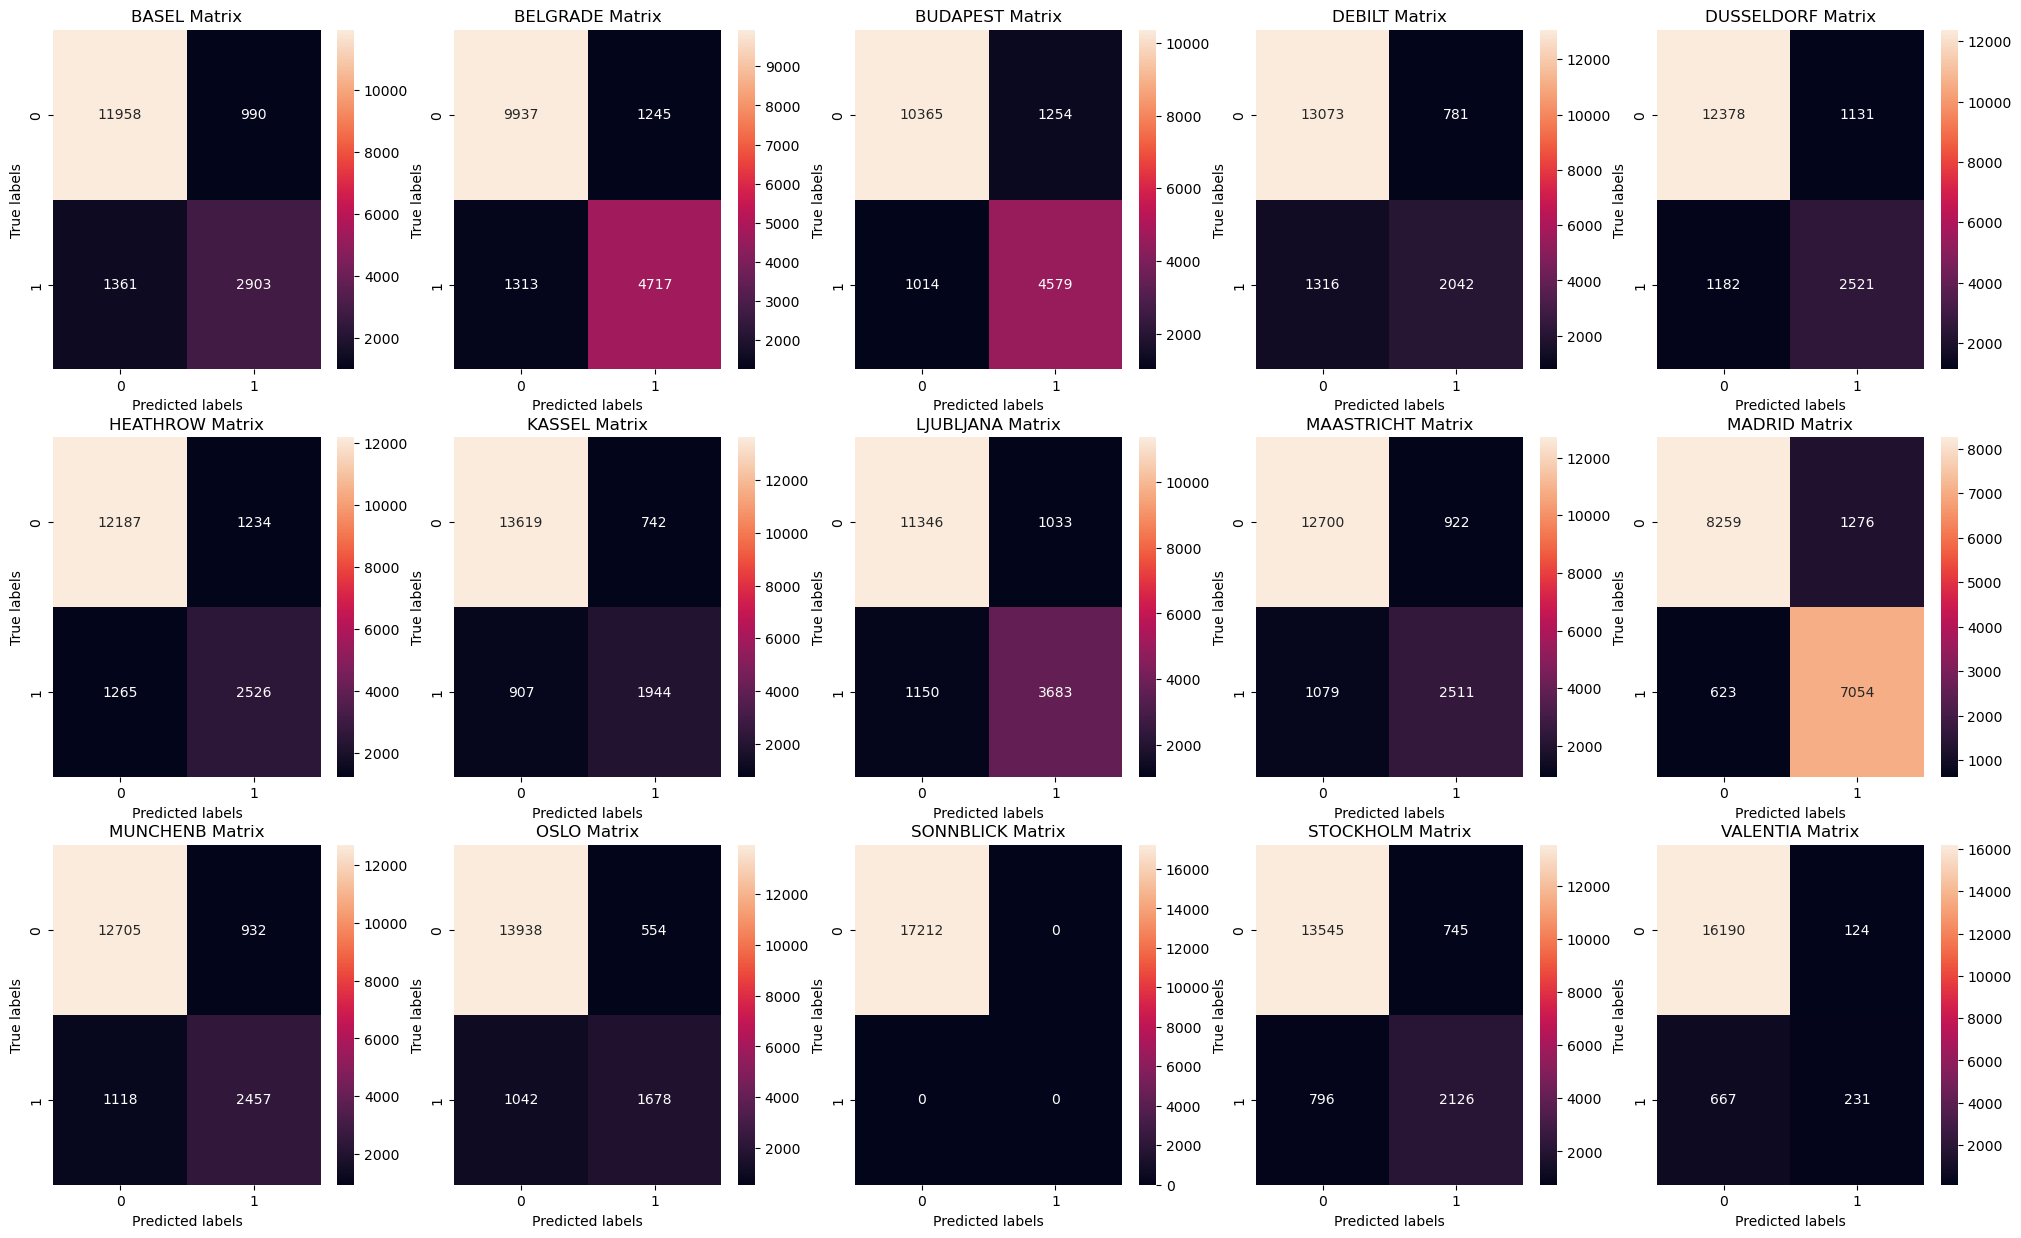

In [202]:
#Plot out multi-confusion matrix for train data

locations = list({x.split("_")[0] for x in X_train.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count], labels=[0, 1])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

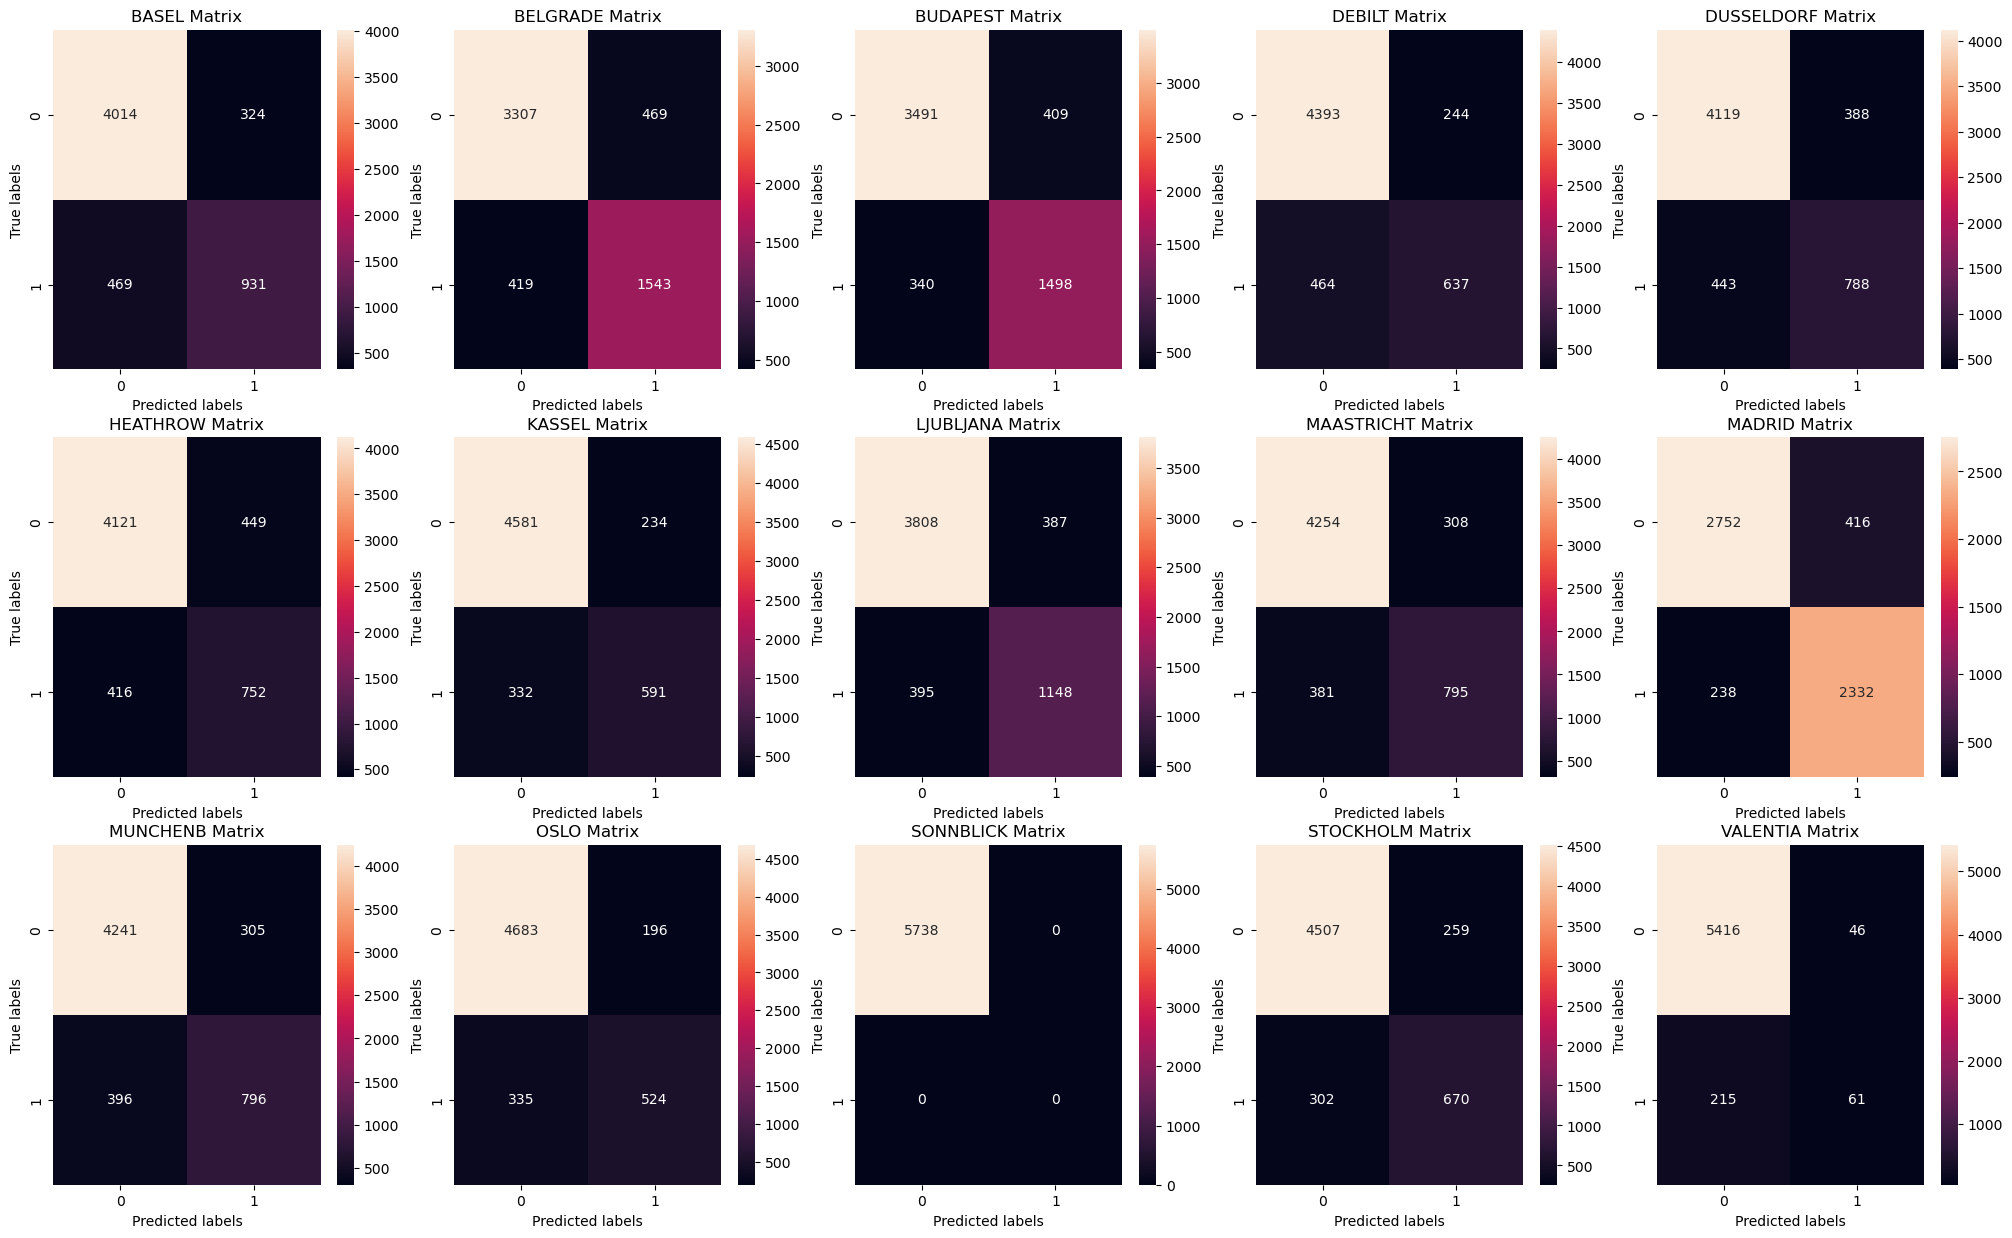

In [204]:
#Plot out multi-confusion matrix for test data

locations = list({x.split("_")[0] for x in X_test.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count], labels=[0, 1])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1